<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Flight-Price-Prediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
train_df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/flight price project/data/train.xlsx')
train_df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [107]:
df=train_df.copy()

In [156]:
test_df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/flight price project/data/test.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Contains no one null value so we can drop those values 

In [6]:
train_df.dropna(inplace = True)

In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

does not contain any null values 

# EDA

In [109]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


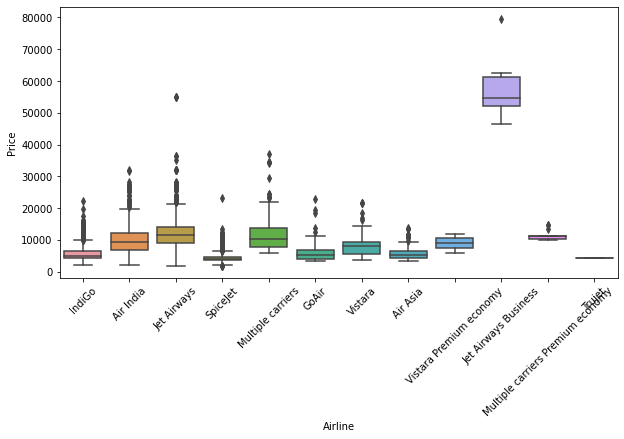

In [131]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


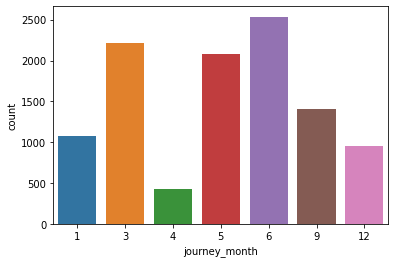

In [134]:
sns.countplot(train_df['journey_month'])

In [141]:
df['journey_weekday']=((pd.DatetimeIndex(df['Date_of_Journey']).dayofweek) // 5 == 1).astype(float)

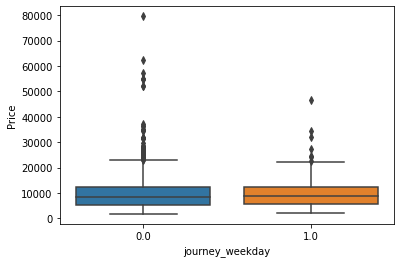

In [150]:
sns.boxplot(x='journey_weekday',y='Price',data=df)

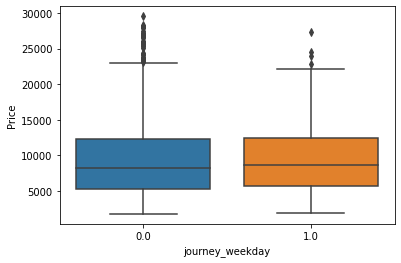

In [149]:
sns.boxplot(x='journey_weekday',y='Price',data=df[df["Price"]<30000])

looks like the is no diffrence in the price for week days and week ends 

# Feature engineering

## Training data 

In [9]:
train_df['journey_day']=pd.to_datetime(train_df['Date_of_Journey']).dt.day
train_df['journey_month']=pd.to_datetime(train_df['Date_of_Journey']).dt.month
train_df['journey_weekday']=((pd.DatetimeIndex(train_df['Date_of_Journey']).dayofweek) // 5 == 1).astype(float)
train_df=train_df.drop(columns='Date_of_Journey',axis=1)
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [10]:
train_df['Additional_Info'].value_counts()*100/train_df['Additional_Info'].value_counts().sum()

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
2 Long layover                   0.009362
Red-eye flight                   0.009362
Name: Additional_Info, dtype: float64

it contains more than 75 percent of no info we can drop this column, and route info can also be droped because it info is covered in no pf stops 

In [11]:
train_df=train_df.drop(columns=['Additional_Info','Route'],axis=1)

In [12]:
train_df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,4,9
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,3,1


In [13]:
#lets convert the dep_time to hour and min
train_df['Dep_hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_min']=pd.to_datetime(train_df['Dep_Time']).dt.minute
train_df=train_df.drop(columns='Dep_Time',axis=1)
train_df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,3,1,16,50


In [14]:
#  converting arriival time to hour and min
train_df['Arrival_hour']=pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute
train_df=train_df.drop(columns='Arrival_Time',axis=1)
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35


In [15]:
# converting duration to hour and min
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [16]:
train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins
train_df=train_df.drop(columns='Duration',axis=1)
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45


In [17]:
train_df.groupby(['Total_Stops'])['Price'].median()


Total_Stops
1 stop      10262
2 stops     12760
3 stops     12954
4 stops     17686
non-stop     4667
Name: Price, dtype: int64

In [18]:
# converting total_stops into ordinal data
# as higher the number of stops higher is the price 
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [19]:
Airline = train_df[["Airline"]]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [20]:
Source = train_df[["Source"]]
Source = pd.get_dummies(Source)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [21]:
Destination = train_df[["Destination"]]
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [22]:
train_df = pd.concat([train_df, Airline, Source, Destination], axis = 1)
train_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
train_df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Testing Data

In [157]:
test_df['journey_day']=pd.to_datetime(test_df['Date_of_Journey']).dt.day
test_df['journey_month']=pd.to_datetime(test_df['Date_of_Journey']).dt.month
test_df=test_df.drop(columns='Date_of_Journey',axis=1)
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [158]:
test_df['Additional_Info'].value_counts()*100/test_df['Additional_Info'].value_counts().sum()

No info                         80.419319
In-flight meal not included     16.622988
No check-in baggage included     2.845376
1 Long layover                   0.037439
Business class                   0.037439
Change airports                  0.037439
Name: Additional_Info, dtype: float64

it contains more than 75 percent of no info we can drop this column, and route info can also be droped because it info is covered in no pf stops 

In [159]:
test_df=test_df.drop(columns=['Additional_Info','Route'],axis=1)

In [160]:
test_df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,journey_day,journey_month
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,5,12
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,21,5
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,21,5
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,24,6
...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1 stop,6,6
2667,IndiGo,Kolkata,Banglore,14:20,16:55,2h 35m,non-stop,27,3
2668,Jet Airways,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1 stop,3,6
2669,Air India,Delhi,Cochin,04:00,19:15,15h 15m,1 stop,3,6


In [161]:
#lets convert the dep_time to hour and min
test_df['Dep_hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_min']=pd.to_datetime(test_df['Dep_Time']).dt.minute
test_df=test_df.drop(columns='Dep_Time',axis=1)
test_df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,6,6,17,30
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,5,12,6,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,21,5,19,15
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,21,5,8,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,24,6,23,55


In [162]:
#  converting arriival time to hour and min
test_df['Arrival_hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute
test_df=test_df.drop(columns='Arrival_Time',axis=1)
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4h,1 stop,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,1 stop,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,24,6,23,55,2,45


In [163]:
# converting duration to hour and min
duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [164]:
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins
test_df=test_df.drop(columns='Duration',axis=1)
test_df.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


In [165]:
# converting total_stops into ordinal data
# as higher the number of stops higher is the price 
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test_df.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [166]:
Airline = test_df[["Airline"]]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [167]:
Source = test_df[["Source"]]
Source = pd.get_dummies(Source)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [168]:
Destination = test_df[["Destination"]]
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [169]:
test_df = pd.concat([test_df, Airline, Source, Destination], axis = 1)
test_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
test_df.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [170]:
test_df['Airline_Trujet']=0
test_df

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Trujet
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2668,1,3,6,21,50,4,25,6,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2669,1,3,6,4,0,19,15,15,15,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [171]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,Y_test,Y_train, graph=True, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #training the model    
  model.fit(X_train,Y_train)

  # finding the best parameters of the model if any 
  if best_parameter==True:
    try:
      # finding the best parameters of the model if any 
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass

  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  Y_pred = model.predict(X_test)

  #finding mean_squared_error
  MSE  = mean_squared_error(Y_test,Y_pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(Y_test,Y_pred)
  print("R2 :" ,r2)
  
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2,'\n')

  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # ploting the line graph of first 100 actual and predicted values 
  if graph ==True:
    plt.figure(figsize=(20,10))
    plt.plot((Y_pred)[:100])
    plt.plot((np.array(Y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()

In [172]:
x_collumns=list(train_df.columns)
x_collumns.remove('Price')
x_collumns

['Total_Stops',
 'journey_day',
 'journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins',
 'Airline_Air Asia',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Banglore',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Banglore',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

In [173]:
X=train_df[x_collumns]
y=train_df['Price']

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

---
# Random forest
---

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
# creating Random Forest Regressor model
rfr=RandomForestRegressor(max_leaf_nodes=60)

MSE : 5530745.004788105
RMSE : 2351.7536020570064
R2 : 0.7425283476828322
Adjusted R2 :  0.741495621075393 



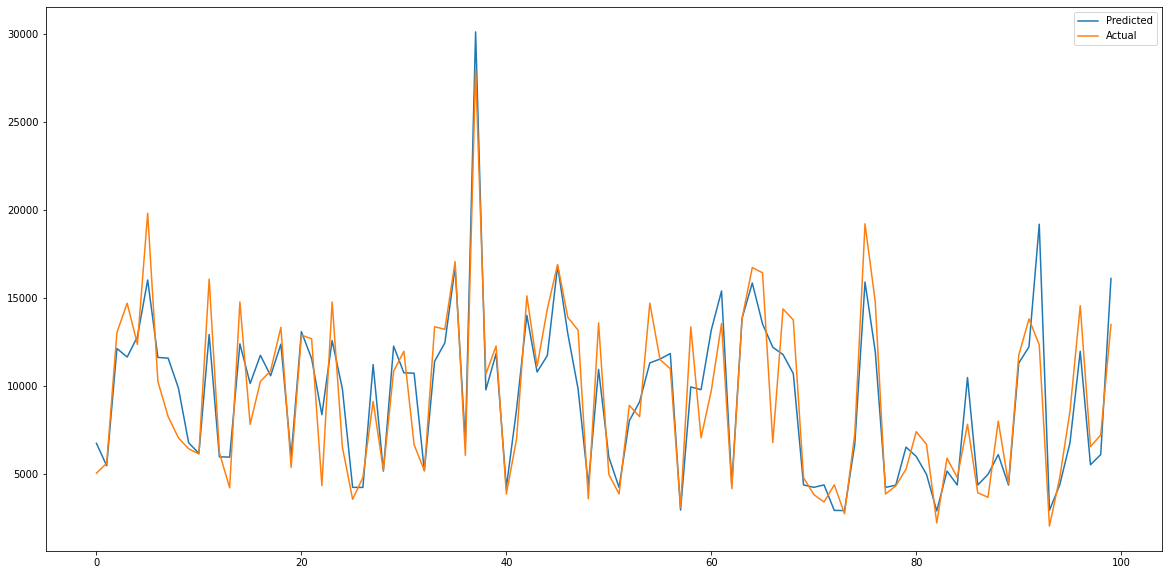

In [60]:
# training and evaluating the Random Forest Regressor
train_and_score(rfr,X_train, X_test, Y_train, Y_test,best_parameter=True)

## implimenting grid search random forest
---

In [62]:
# creating RandomForestRegressor model
rfr=RandomForestRegressor()

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [150,200,250],'max_depth': [7,10,13]}
rfr_grid = GridSearchCV(estimator=rfr,param_grid = grid_values_rf, scoring='neg_mean_squared_error',cv=5,verbose=0,n_jobs=-1)

The best parameters found out to be : {'max_depth': 13, 'n_estimators': 250}
 
where negative mean squared error is:  -4554973.984705157 

MSE : 4924031.538739802
RMSE : 2219.015894206214
R2 : 0.7707725568176406
Adjusted R2 :  0.7698531185897846 



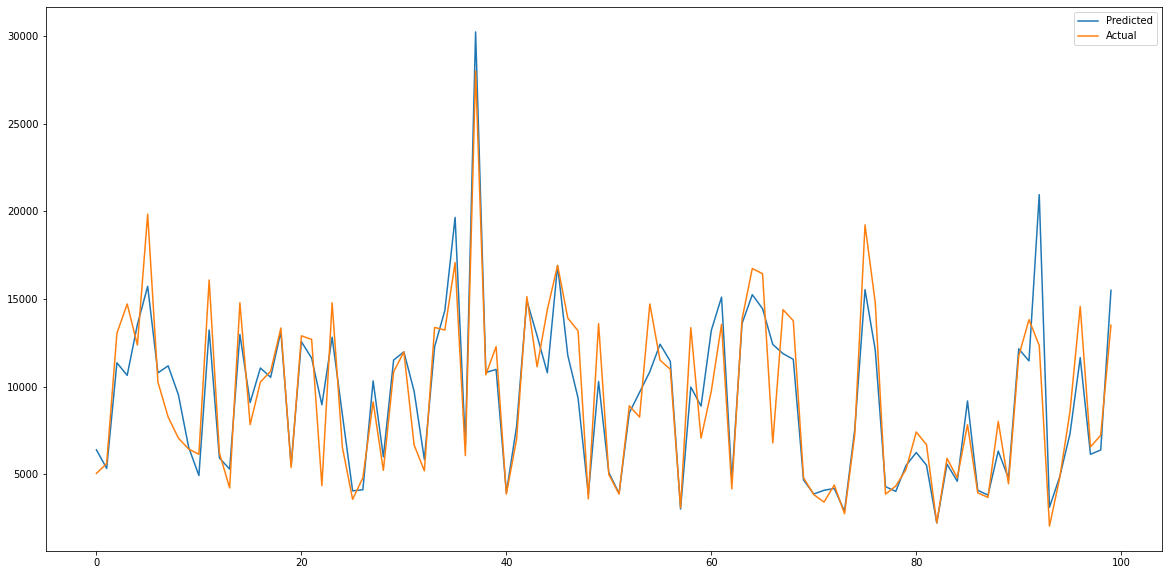

In [66]:
# training and evaluating the Random Forest Regressor
train_and_score(rfr_grid,X_train, X_test, Y_train, Y_test)

---
#XGboost
---

In [67]:
from xgboost import XGBRegressor

In [68]:
# creating XGBRegressor model
xgbr=XGBRegressor()

## implimenting grid search xgb
---

In [69]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbr_param={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
xgbr_grid=GridSearchCV(estimator=xgbr,param_grid=xgbr_param,cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1)

[15:13:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The best parameters found out to be : {'max_depth': 7, 'n_estimators': 150}
 
where negative mean squared error is:  -4501962.090785366 

MSE : 4471625.778166836
RMSE : 2114.6218995761005
R2 : 0.7918333105843909
Adjusted R2 :  0.7909983476787379 



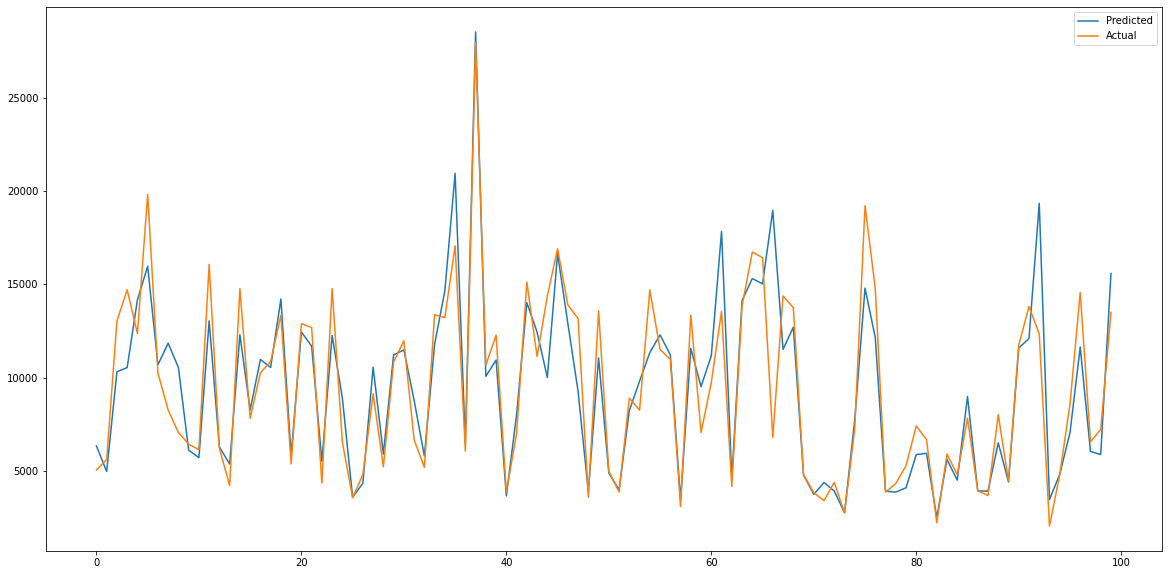

In [70]:
# training and evaluating the xgb_grid
train_and_score(xgbr_grid,X_train, X_test, Y_train, Y_test)

#lightGBM

In [71]:
import lightgbm as lgb

In [72]:
lgbr=lgb.LGBMRegressor()

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13,15]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best parameters found out to be : {'max_depth': 13, 'n_estimators': 250}
 
where negative mean squared error is:  -4177340.1476627975 

MSE : 3510597.715326317
RMSE : 1873.658911148536
R2 : 0.8296903305687099
Adjusted R2 :  0.8276244058447518 



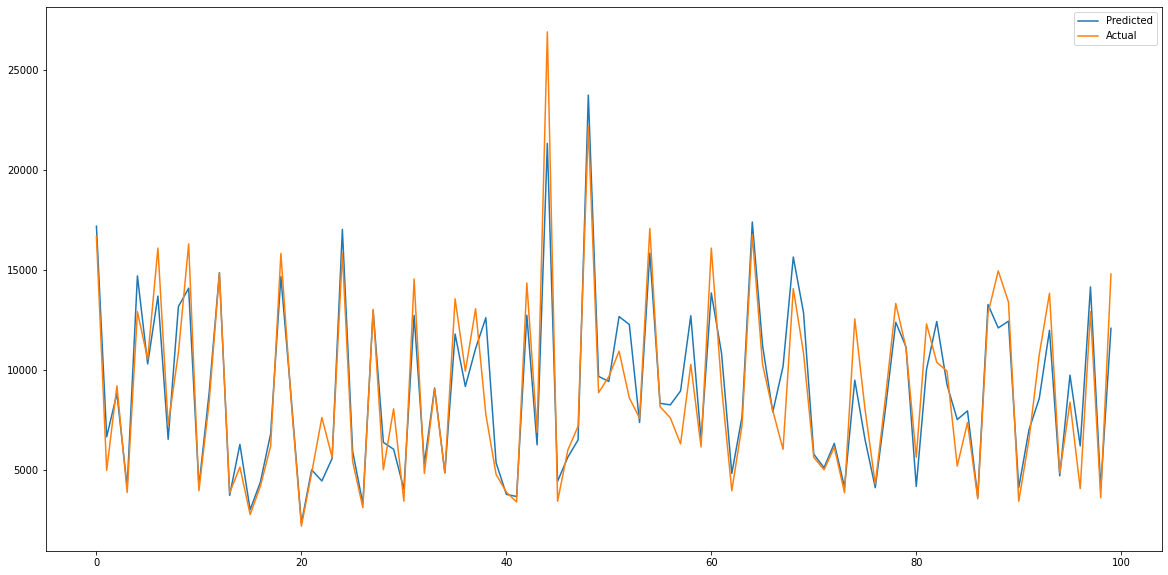

In [90]:
# training and evaluating the lgbr_grid
train_and_score(lgbr_grid, X_test, X_train, Y_test, Y_train)

# save model

In [96]:
import pickle
# open a file, where you want to store the data
file = open('flight_lgbm.pkl', 'wb')

# dump information to that file
pickle.dump(lgbr_grid, file)

In [100]:
model = open('/content/drive/MyDrive/Colab Notebooks/flight price project/flight_lgbm (1).pkl','rb')
lgbm_regg = pickle.load(model)

In [178]:
result=pd.DataFrame(lgbm_regg.predict(test_df),columns=['Price'])

In [181]:
result_df=pd.concat([result,test_df],axis=1)
result_df

,Price,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Trujet
0,11818.624037,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,4936.400017,1,5,12,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,12863.391967,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,10632.804822,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,3687.368367,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,8539.544738,1,6,6,20,30,20,25,23,55,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2667,4851.651186,0,27,3,14,20,16,55,2,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2668,19808.794725,1,3,6,21,50,4,25,6,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2669,12752.831282,1,3,6,4,0,19,15,15,15,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
